## 1. EDA

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np 
import pandas as pd
import sklearn 
from sklearn import model_selection
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

In [3]:
# randsom seed
seed=1234
np.random.seed(seed)

In [4]:
num_classes=26

In [5]:
DATA_IN_PATH = '/content/drive/My Drive/DataCollection/OSAM/'

In [6]:
print("파일 크기 : ")
for file in os.listdir(DATA_IN_PATH):
    if 'csv' in file :
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

파일 크기 : 
combined.csv                  6.62MB
combined_dup(-2000).csv       4.55MB
combined_clean(-2300).csv     4.51MB
combined_clean(6000)_sam.csv  3.98MB
OSAM33000.csv                 3.95MB
OSAM39800.csv                 3.93MB
OSAM42111.csv                 3.87MB
OSAM51135.csv                 2.9MB


In [7]:
#loading csv data
all_data = pd.read_csv(DATA_IN_PATH + 'OSAM51135.csv', quoting = 2)
all_data.head()

,symptom,class
0,질문하겠습니다. 이어폰을 음량을 0으로 하고 끼고만 있어도 귀에 안 좋나요?,ENT
1,독감예방주사,IP
2,목에 음식물 그대로 끼어서 계속 이물감이 있습니다,ENT
3,케겔운동 궁금한것,REHM
4,등 통증 관련문의,NS


In [8]:
# all_data의 전체 길이
len(all_data)

51134

In [9]:
#stratififed split to train_data, test_data
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=seed)

for train_idx, test_idx in split.split(all_data, all_data["class"]):
    train_data = all_data.loc[train_idx]
    test_data = all_data.loc[test_idx]

In [10]:
print('전체 학습데이터의 개수: {}'.format(len(train_data)))
print('전체 학습데이터의 개수: {}'.format(len(test_data)))

전체 학습데이터의 개수: 40907
전체 학습데이터의 개수: 10227


In [11]:
train_length = train_data['symptom'].astype(str).apply(len)

In [12]:
train_length.head()

18266    50
21585    14
33379    14
781      12
681      12
Name: symptom, dtype: int64

Text(0, 0.5, 'Number of symptom')

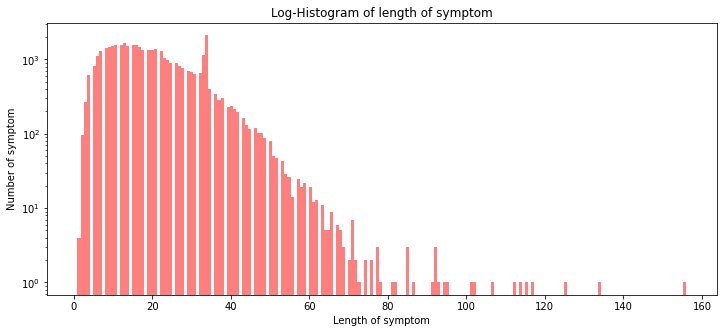

In [13]:
# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(train_length, bins=200, alpha=0.5, color= 'r', label='word')
plt.yscale('log', nonposy='clip')
# 그래프 제목
plt.title('Log-Histogram of length of symptom')
# 그래프 x 축 라벨
plt.xlabel('Length of symptom')
# 그래프 y 축 라벨
plt.ylabel('Number of symptom')

In [14]:
print('증상 길이 최대 값: {}'.format(np.max(train_length)))
print('증상 길이 최소 값: {}'.format(np.min(train_length)))
print('증상 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('증상 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('증상 길이 중간 값: {}'.format(np.median(train_length)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('증상 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('증상 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))

증상 길이 최대 값: 156
증상 길이 최소 값: 1
증상 길이 평균 값: 20.14
증상 길이 표준편차: 11.03
증상 길이 중간 값: 18.0
증상 길이 제 1 사분위: 12.0
증상 길이 제 3 사분위: 27.0


{'boxes': [<matplotlib.lines.Line2D at 0x7f8aa75792e8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8aa7579cf8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8aa7583b00>],
 'means': [<matplotlib.lines.Line2D at 0x7f8aa75837b8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8aa7583438>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8aa75795f8>,
  <matplotlib.lines.Line2D at 0x7f8aa7579978>]}

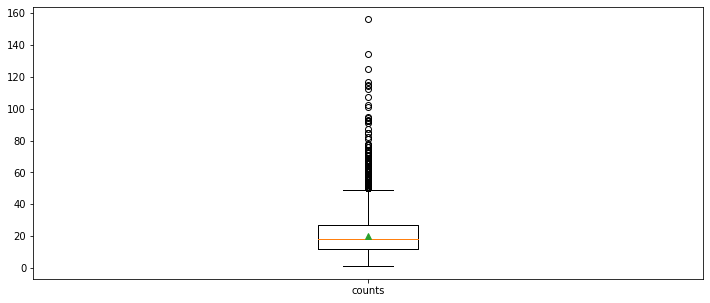

In [15]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot(train_length,
             labels=['counts'],
             showmeans=True)

In [16]:
# 보통은 문자열이 아닌 데이터는 삭제하나, 증상의 경우 발열, 체중 등과 같은 내용이 중요하므로 숫자도 살려둔다.
train_symptom = [symptom for symptom in train_data['symptom'] if type(symptom) is (str or int or float)]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


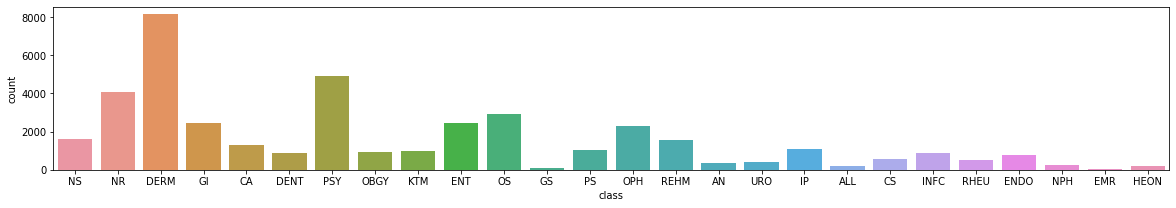

In [17]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(20, 3)
sns.countplot(train_data['class'])

In [18]:
# DERM: 피부과 / GS: 외과 / IP: 호흡기내과 / FM: 가정의학과 / GI: 소화기내과 / OPH: 안과
# NR: 신경과 / ENT: 이비인후과 / PSY : 신경정신과 / HEON: 혈액종양내과 / RHEU: 류마티스내과
# REHM: 재활의학과 / NS: 신경외과 / AN: 마취통증의학과 / DENT: 치과 / PS: 성형외과
# RAD: 영상의학과 / CS: 흉부외과 / INFC: 감염내과 / RAON: 방사선종양학과 / OS: 정형외과 
# EMR: 응급의학과 / ENDO: 내분비내과 / CA: 순환기내과 / KTM: 한방과 / OBGY: 산부인과
# URO: 비뇨기과 / ALL: 알레르기 내과 / NPH: 신장내과 / OEM:직업환경의학과 / COAN: 대장항문외과
# LAB: 진단검사의학과 

In [19]:
# convert class from string to integer
class_to_label = {'DERM': 0, 'GS': 1, 'IP': 2, 'GI':3, 'OPH':4,
                  'NR': 5, 'ENT': 6, 'PSY': 7, 'HEON': 8, 'RHEU': 9,
                  'REHM': 10, 'NS': 11, 'AN': 12, 'DENT': 13, 'PS': 14,
                  'CS': 15, 'INFC': 16, 'OS': 17,
                  'EMR': 18, 'ENDO': 19, 'CA': 20, 'KTM': 21, 'OBGY': 22,
                  'URO': 23, 'ALL': 24, 'NPH': 25}

train_data['label'] = train_data['class'].map(class_to_label)
test_data['label'] = test_data['class'].map(class_to_label)
train_data.head()

,symptom,class,label
18266,4번 요추 디스크가 있고 엉덩이와 종아리 통증이 있는데. 어떤 치료를 받아야 ...,NS,11
21585,왼쪽 팔 통증과 저림 증상,NR,5
33379,발바닥 갈색 반점 뭔가요?,DERM,0
781,요가 운동할때 위 신물,GI,3
681,이유없이 흉부가 아파요,CA,20


In [20]:
# severe imbalenced data가 확인되지만 real-world로 반영한다고 생각하고 그대로 진행한다.
# 단, FM(가정의학과)의 비중이 너무 높고 오히려 OS 비중이 낮은 것은 본 프로젝트가 군인 대상인 점을 감안하여 조정이 필요할 것 같다.
for i in range(num_classes):
  print("증상 개수: {}".format(train_data['class'].value_counts()[i]))

증상 개수: 8138
증상 개수: 4923
증상 개수: 4064
증상 개수: 2902
증상 개수: 2477
증상 개수: 2452
증상 개수: 2282
증상 개수: 1622
증상 개수: 1547
증상 개수: 1312
증상 개수: 1067
증상 개수: 1034
증상 개수: 982
증상 개수: 936
증상 개수: 892
증상 개수: 880
증상 개수: 776
증상 개수: 570
증상 개수: 523
증상 개수: 417
증상 개수: 334
증상 개수: 226
증상 개수: 218
증상 개수: 182
증상 개수: 94
증상 개수: 57


In [21]:
# 각 증상 서술의 단어 수를 확인.
# 데이터를 띄어쓰기 기준으로 나눠서 그 개수를 하나의 변수로 할당한다.
train_word_counts = train_data['symptom'].astype(str).apply(lambda x:len(x.split(' ')))

Text(0, 0.5, 'Number of symptom')

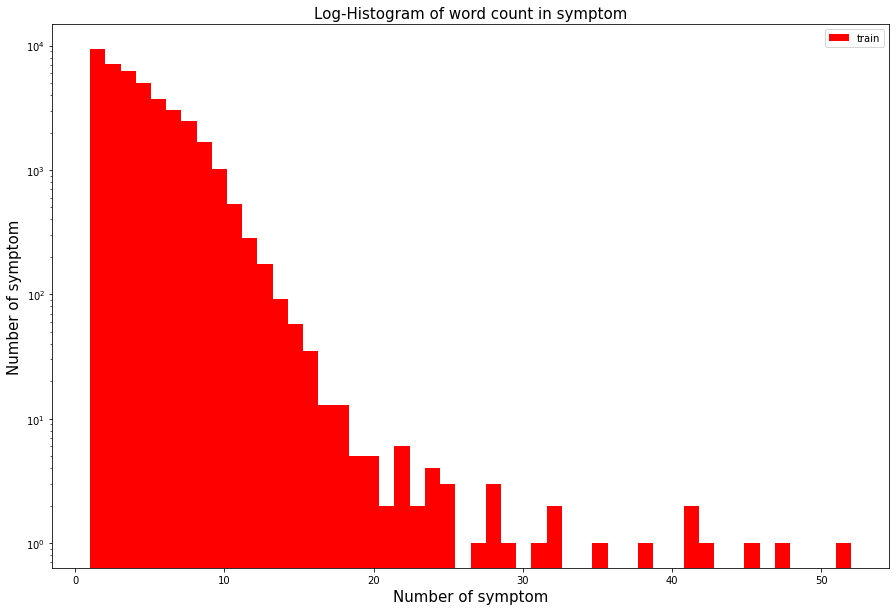

In [22]:
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, facecolor='r',label='train')
plt.title('Log-Histogram of word count in symptom', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of symptom', fontsize=15)
plt.ylabel('Number of symptom', fontsize=15)

In [23]:
print('증상 단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('증상 단어 개수 최소 값: {}'.format(np.min(train_word_counts)))
print('증상 단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('증상 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('증상 단어 개수 중간 값: {}'.format(np.median(train_word_counts)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('증상 단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('증상 단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))

증상 단어 개수 최대 값: 52
증상 단어 개수 최소 값: 1
증상 단어 개수 평균 값: 4.68
증상 단어 개수 표준편차: 2.78
증상 단어 개수 중간 값: 4.0
증상 단어 개수 제 1 사분위: 3.0
증상 단어 개수 제 3 사분위: 6.0


In [24]:
# 특수문자 확인하기
qmarks = np.mean(train_data['symptom'].astype(str).apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
fullstop = np.mean(train_data['symptom'].astype(str).apply(lambda x: '.' in x)) # 마침표
                  
print('물음표가있는 질문: {:.2f}%'.format(qmarks * 100))
print('마침표가 있는 질문: {:.2f}%'.format(fullstop * 100))

물음표가있는 질문: 18.89%
마침표가 있는 질문: 29.00%


## 2. FastText

In [25]:
import re
from tqdm import tqdm

import tensorflow as tf 

### Hyperparameters

In [26]:
#random seed 고정
tf.random.set_seed(seed)

BATCH_SIZE = 32
NUM_EPOCHS = 50
 
DATA_OUT_PATH = "/content/drive/My Drive/DataCollection/OSAM"

### Tokenizers

In [27]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [28]:
train_sentence, train_label = train_data["symptom"], train_data["label"]
test_sentence, test_label = test_data["symptom"], test_data["label"]

In [29]:
t = Tokenizer()
t.fit_on_texts(train_sentence)

vocab_size = len(t.word_index)+1
vocab_size

54219

In [30]:
X_encoded = t.texts_to_sequences(train_sentence)
X_encoded

[[2597, 1471, 2115, 201, 5264, 197, 7, 23, 58, 252, 198, 2324],
 [6, 156, 327, 230, 24],
 [272, 1472, 405, 223],
 [15445, 3279, 301, 15446],
 [760, 9346, 13],
 [48, 116, 3280, 638, 2598, 1225, 2599],
 [15447, 218, 258],
 [675],
 [456],
 [89, 2600, 1110, 467, 894, 122],
 [3762, 1944, 289, 15448, 715, 15449],
 [3281, 393],
 [8, 3282, 13],
 [44, 85, 1046, 6724, 124],
 [116, 2116, 6725, 657, 113, 15450, 309, 15451],
 [9347, 163],
 [3283, 30, 1, 15452],
 [1165, 15453, 6726, 990, 715, 15454],
 [3763, 15455, 15456, 9348, 9349],
 [2325, 9350, 51, 1558, 9351, 19],
 [1303, 3284, 895],
 [2906, 364],
 [420, 2117, 946, 15457],
 [6727, 15458, 1, 15459, 117],
 [105, 789, 241],
 [5265, 1473],
 [365, 1381, 2326, 2327, 15460, 2328],
 [1680, 340, 15461, 2329, 15462, 181, 1559, 1560, 15463, 2118, 1945, 15464],
 [1226, 25],
 [9352, 6728, 248, 19, 716],
 [51, 5266, 228, 947, 4353, 2119, 1382, 15465, 5267, 3285],
 [2330, 6729],
 [318, 15466, 372],
 [15467],
 [105, 15468, 9353, 15469, 341],
 [639, 95, 211],
 

In [31]:
t_X_encoded = t.texts_to_sequences(test_sentence)
t_X_encoded

[[],
 [7733, 1, 485, 29],
 [3337, 1714],
 [3573, 168, 701, 39, 394],
 [745, 225, 14],
 [566, 305, 428, 3],
 [2654, 4, 31, 65, 4],
 [8812, 2588, 5153, 10, 298, 2732],
 [3165, 58, 203],
 [26384, 4742, 45036, 1322, 95, 176],
 [186],
 [],
 [8616, 40776, 638, 1216, 47],
 [15826, 5792],
 [286, 62, 3029, 39270, 515],
 [],
 [8, 5079, 5573, 401, 1067, 228, 487],
 [1747, 2, 13],
 [148, 9633, 580, 3],
 [1062, 3933],
 [2343, 638, 302, 3421, 8, 1213, 237],
 [5645, 278, 28004, 406],
 [204, 451, 23, 128],
 [433],
 [4200, 1392, 123],
 [146, 305, 342, 4094],
 [3876, 4],
 [6399, 1882],
 [],
 [978, 1195, 4101, 978],
 [326, 1500],
 [11782, 213],
 [604, 322, 22617, 1463, 25],
 [9859, 343, 716],
 [136, 333, 217, 1243, 76],
 [39353, 1449],
 [1505, 359, 11871, 685, 9],
 [47267, 30797],
 [510],
 [57, 630, 10460],
 [14760, 134, 134, 423, 11443, 32, 16676, 267, 423, 5688],
 [],
 [138, 73, 4634, 19, 195],
 [2058, 1273, 2099, 145, 538, 5158, 31],
 [50, 2, 635],
 [14712, 2522, 15029, 2, 82, 882, 7, 3],
 [3547, 1681

In [32]:
max_len = max(len(i) for i in X_encoded)
max_len

28

In [33]:
X_train = pad_sequences(X_encoded, maxlen=max_len, padding='post')
Y_train = np.array(train_label)
print(X_train.shape)
Y_train.shape

(40907, 28)


(40907,)

In [34]:
X_test = pad_sequences(t_X_encoded, maxlen=max_len, padding='post')
Y_test = np.array(test_label)
print(X_test.shape)
Y_test.shape

(10227, 28)


(10227,)

### Pretrained FastText embedding for Korean

In [35]:
!pip install fasttext

     |████████████████████████████████| 71kB 2.3MB/s 
  Created wheel for fasttext: filename=fasttext-0.9.2-cp36-cp36m-linux_x86_64.whl size=3024904 sha256=984a9a76354640c221dd7eab1d1defae4594a1768745a8402a6822376863123b
  Stored in directory: /root/.cache/pip/wheels/98/ba/7f/b154944a1cf5a8cee91c154b75231136cc3a3321ab0e30f592
Successfully built fasttext


In [36]:
import fasttext.util
fasttext.util.download_model('ko', if_exists='ignore')  # Korean
ko_model = fasttext.load_model('cc.ko.300.bin')

In [37]:
# To make embedding matrix
N = ko_model.get_dimension()
embedding_matrix = np.zeros((vocab_size, N))
# 단어 집합 크기의 행과 N개 열을 가지는 행렬 생성. 값은 전부 0으로 채워진다.
embedding_matrix.shape

(54219, 300)

In [38]:
ko_model.get_words

<bound method _FastText.get_words of <fasttext.FastText._FastText object at 0x7f8a77e8cc50>>

In [39]:
for word, i in t.word_index.items(): #훈련 데이터의 단어 집합에서 단어와 정수 인덱스르 1개씩 꺼내온다.
  temp = ko_model.get_word_vector(word) #단어(key) 해당되는 임베딩 벡터의 300개의 값(value)를 임시 변수에 저장
  if temp is not None:
    embedding_matrix[i] = temp


### LSTM model

In [40]:
from keras.models import Model
from keras.layers import Input, Dense, Embedding, SpatialDropout1D, add, concatenate
from keras.layers import LSTM, Bidirectional, GlobalMaxPooling1D, GlobalAveragePooling1D

In [41]:
embedding_dim = 16
model = tf.keras.Sequential([
tf.keras.layers.Embedding(vocab_size, N, weights=[embedding_matrix],
              input_length=max_len, trainable=False),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
tf.keras.layers.Dense(embedding_dim, activation='relu'),
tf.keras.layers.Dense(num_classes, activation='softmax')])

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 28, 300)           16265700  
_________________________________________________________________
bidirectional (Bidirectional (None, 32)                40576     
_________________________________________________________________
dense (Dense)                (None, 16)                528       
_________________________________________________________________
dense_1 (Dense)              (None, 26)                442       
Total params: 16,307,246
Trainable params: 41,546
Non-trainable params: 16,265,700
_________________________________________________________________


### Compile and training

In [43]:
# 학습 준비하기
optimizer = tf.keras.optimizers.Adam(3e-4)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')

In [44]:
model.compile(optimizer=optimizer, loss=loss, metrics=[metric], experimental_run_tf_function=False)

In [45]:
model_name = "tf2_FastText_symptom2class"

# overfitting을 막기 위한 earlystop 추가
earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.0001,patience=2)
# min_delta: the threshold that triggers the termination (acc should at least improve 0.0001)
# patience: no improvment epochs (patience = 1, 1번 이상 상승이 없으면 종료)

checkpoint_path = os.path.join(DATA_OUT_PATH, model_name, 'weights.h5')
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create path if exists
if os.path.exists(checkpoint_dir):
    print("{} -- Folder already exists \n".format(checkpoint_dir))
else:
    os.makedirs(checkpoint_dir, exist_ok=True)
    print("{} -- Folder create complete \n".format(checkpoint_dir))
    
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True)

/content/drive/My Drive/DataCollection/OSAM/tf2_FastText_symptom2class -- Folder already exists 



In [46]:
# 학습과 eval 시작
history = model.fit(X_train, Y_train, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE,
                    validation_data=(X_test, Y_test),
                    validation_steps=(len(Y_test)/BATCH_SIZE), 
                    callbacks=[cp_callback, earlystop_callback])

#steps_for_epoch

print(history.history)

Epoch 1/50
1277/1279 [============================>.] - ETA: 0s - loss: 3.1013 - accuracy: 0.2361
Epoch 00001: val_accuracy improved from -inf to 0.26498, saving model to /content/drive/My Drive/DataCollection/OSAM/tf2_FastText_symptom2class/weights.h5
1279/1279 [==============================] - 12s 9ms/step - loss: 3.1013 - accuracy: 0.2361 - val_loss: 3.0575 - val_accuracy: 0.2650
Epoch 2/50
1274/1279 [============================>.] - ETA: 0s - loss: 3.0453 - accuracy: 0.2801
Epoch 00002: val_accuracy improved from 0.26498 to 0.27447, saving model to /content/drive/My Drive/DataCollection/OSAM/tf2_FastText_symptom2class/weights.h5
1279/1279 [==============================] - 11s 8ms/step - loss: 3.0452 - accuracy: 0.2802 - val_loss: 3.0491 - val_accuracy: 0.2745
Epoch 3/50
1277/1279 [============================>.] - ETA: 0s - loss: 3.0405 - accuracy: 0.2834
Epoch 00003: val_accuracy did not improve from 0.27447
1279/1279 [==============================] - 10s 8ms/step - loss: 3.04

## Testing for new sentences

In [47]:
# exchanging key and value
label_to_class = {v:k for k,v in class_to_label.items()} 
label_to_class

{0: 'DERM',
 1: 'GS',
 2: 'IP',
 3: 'GI',
 4: 'OPH',
 5: 'NR',
 6: 'ENT',
 7: 'PSY',
 8: 'HEON',
 9: 'RHEU',
 10: 'REHM',
 11: 'NS',
 12: 'AN',
 13: 'DENT',
 14: 'PS',
 15: 'CS',
 16: 'INFC',
 17: 'OS',
 18: 'EMR',
 19: 'ENDO',
 20: 'CA',
 21: 'KTM',
 22: 'OBGY',
 23: 'URO',
 24: 'ALL',
 25: 'NPH'}

In [85]:
def specialty_predict(new_sentence):
  new_encoded = t.texts_to_sequences(new_sentence)
  encoded = pad_sequences(new_encoded, maxlen=max_len, padding='post')
  y_output = model.predict(encoded)  

  y_pred = y_output[0]
  y_label = y_pred.argmax(axis=0)
  y_prob = y_pred[y_label] 
  y_class = label_to_class.get(y_label)  

  if y_prob > 0.5 :
    print("{:.2f}% 확률로 {}과를 방문하셔야합니다.\n".format(y_prob * 100, y_class))
  else:
    print("증상을 좀 더 자세히 적어주세요.")

In [86]:
input_sentence = "통풍으로 엄지발가락이 부었어요"
specialty_predict(input_sentence)

81.86% 확률로 PSY과를 방문하셔야합니다.



In [87]:
input_sentence = "잠이 너무 안와서 다음날 몽롱해요"
specialty_predict(input_sentence)

100.00% 확률로 PSY과를 방문하셔야합니다.



In [88]:
input_sentence = "오래된 이명과 비염이 있어요"
specialty_predict(input_sentence)

80.22% 확률로 DERM과를 방문하셔야합니다.



In [89]:
input_sentence = "뇌경색 이후에 어떤 운동을 하는게 좋은가요"
specialty_predict(input_sentence)

100.00% 확률로 NR과를 방문하셔야합니다.



In [90]:
input_sentence = "항문 주변이 따가워요"
specialty_predict(input_sentence)

99.80% 확률로 PSY과를 방문하셔야합니다.



In [91]:
input_sentence = "결막염"
specialty_predict(input_sentence)

99.40% 확률로 DERM과를 방문하셔야합니다.

